# LAB Sheet-09: Logistic Regression

Consider the log-likelihood function for logistic regression:

$$L(\theta)=\sum_{i=1}^m y^{(i)} \log h_\theta\left(x^{(i)}\right)+\left(1-y^{(i)}\right) \log \left(1-h_\theta\left(x^{(i)}\right)\right)$$

For the following, you will need to calculate the value of the Hessian H of the above function.

(a) The files $\texttt{logisticX.csv}$ and $\texttt{logisticY.csv}$ contain the inputs $(x(i) \in R2)$ and outputs $(y^{(i)} \in {0, 1})$ respectively for a binary classification problem, with one training example per row. Implement Newton’s method for optimizing $L(\theta)$, and apply it to fit a logistic regression model to the data. Initialize Newton’s method with $\theta = \vec{0}$ (the vector of all zeros). What are the coefficients $\theta$ resulting from your fit? 

In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [27]:
X = np.loadtxt('logisticX.csv',delimiter=',')
y = np.loadtxt('logisticY.csv',delimiter=',').reshape(-1,1)
mean = np.mean(X)
var = np.std(X)
# normalizing 
X = X - mean 
X = X / var 
X = np.append(np.ones((X.shape[0], 1)), X, axis = 1)

In [28]:
theta = np.zeros([3,1])
g = (1 / (1 + np.exp(-1*np.dot(X, theta))))
grad = np.dot(X.T, (g - y))
I = np.identity(X.shape[0]) 
diag = I * np.dot(g.T, (1 - g))
H = np.dot(X.T, np.dot(diag, X))

In [29]:
theta_final = theta - np.dot(np.linalg.pinv(H), grad) 
print('Final Parameters:\n', theta_final)

Final Parameters:
 [[-0.00064394]
 [ 0.00921424]
 [-0.00898329]]


(b) Plot the training data (your axes should be $x_{1}$ and $x_{2}$ , corresponding to the two coordinates
of the inputs, and you should use a different symbol for each point plotted to indicate whether that
example had label 1 or 0). Also plot on the same figure the decision boundary fit by logistic regression.
(i.e., this should be a straight line showing the boundary separating the region where $h(x) > 0.5$ from
where $h(x) \le 0.5$.

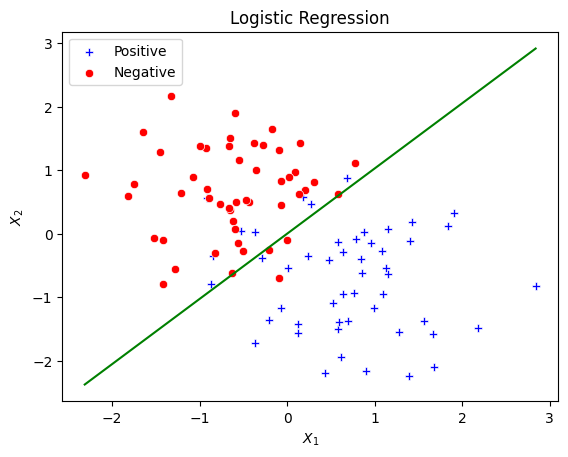

In [44]:
# your code solution here
x_neg = np.array([X[i] for i in range(len(y)) if y[i] == 0])
x_pos = np.array([X[i] for i in range(len(y)) if y[i] == 1])
x_val = np.array([np.min(X[:, 1] ), np.max(X[:, 1] )]).reshape(1, -1)
y_val = np.dot((-1.0 / theta_final[2:3]), np.dot(theta_final[1:2], x_val)) - theta_final[0:1]
    
sns.scatterplot(x = x_pos[:, 1], y = x_pos[:, 2], color = 'blue', marker = 'P', label = 'Positive')
sns.scatterplot(x = x_neg[:, 1], y = x_neg[:, 2], color = 'red', marker = 'o', label = 'Negative')
sns.lineplot(x = x_val.ravel(), y = y_val.ravel(), color = 'green')

plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Logistic Regression')
plt.legend()